<a href="https://colab.research.google.com/github/Darshan2104/PlayWithPytorch/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([100, 1, 28, 28]) torch.Size([100])


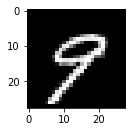

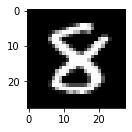

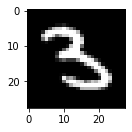

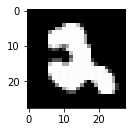

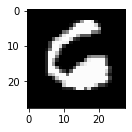

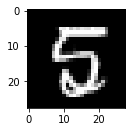

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Paramters
# For image in RNN we are using one row as one sequence!
# input_size = 784    # 28x28
hidden_size = 128
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.005

input_size = 28
sequence_length = 28
number_layer = 2


# MNIST Data
train_dataset = torchvision.datasets.MNIST(root='./data', train =True, transform = transforms.ToTensor(), download =True)
test_dataset = torchvision.datasets.MNIST(root='./data', train =False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset =train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset =test_dataset, batch_size=batch_size, shuffle = False)

# One Batch of data
examples = iter(train_loader)
samples, lable = examples.next()
print(samples.shape, lable.shape) # 100 images(batch-size) 1-channle 28x28 image size 

for i in range(6):
  plt.subplot(2,3,i+1) # 2 rows and 3 columns and index (i+1)
  plt.imshow(samples[i][0],cmap='gray')
  plt.show()

In [7]:
class RNN(nn.Module):
  def __init__(self,input_size, hidden_size,number_layer, num_classes):
    super(RNN,self).__init__()
    # create out layers
    self.num_layer = number_layer
    self.hidden_size = hidden_size
    self.gru = nn.GRU(input_size, hidden_size,number_layer, batch_first=True)
    # input shape  x-> (batch_size, seq_length, input_size)
    # fc = fully connected! 
    self.fc = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    h0 = torch.zeros(self.num_layer, x.size(0),self.hidden_size).to(device)
    # return output-> hidden state after all the t-steps and _ -> h_n hidden state of nth step
    out,_ = self.gru(x,h0)
    # out shape -> (batch_size, seq_length,hidden_size)
    # out (N,28,128)
      # -1 is for last time step only
    out = out[:,-1,:]
    # out (N,128)
    out = self.fc(out)
    return out
model = RNN(input_size, hidden_size, number_layer, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =learning_rate)

# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  # loop over all the batches
  for i,(images, labels) in enumerate(train_loader):
    # Shape  100, 1, 28, 28
    # input size= 28x28 so tensor  need 100, 28, 28
    images = images.reshape(-1,sequence_length, input_size).to(device)
    labels = labels.to(device)

    # forward pass
    output = model(images)
    loss = criterion(output, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f'epoch : {epoch+1} / {num_epochs}, step : {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


# testing

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  
  for images, labels in test_loader:
    images = images.reshape(-1,sequence_length, input_size).to(device)
    labels = labels.to(device)

    outputs = model(images)

# max returns  values and index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc:.4f}')

epoch : 1 / 2, step : 100/600, loss = 0.4191
epoch : 1 / 2, step : 200/600, loss = 0.1354
epoch : 1 / 2, step : 300/600, loss = 0.1191
epoch : 1 / 2, step : 400/600, loss = 0.1728
epoch : 1 / 2, step : 500/600, loss = 0.2119
epoch : 1 / 2, step : 600/600, loss = 0.0505
epoch : 2 / 2, step : 100/600, loss = 0.0074
epoch : 2 / 2, step : 200/600, loss = 0.0635
epoch : 2 / 2, step : 300/600, loss = 0.1367
epoch : 2 / 2, step : 400/600, loss = 0.0899
epoch : 2 / 2, step : 500/600, loss = 0.0272
epoch : 2 / 2, step : 600/600, loss = 0.0451
accuracy = 98.2100
